## This Jupyter notebook uses mdtraj to:
#### a) Read in the md trajectory of beta amyloid
#### b) Compute the end-end distance at each time, and the radius of gyration at each time
#### c) Plot the end-end distance and radius of gyration vs time on the same plot, clearly labeled (same y axis is fine this time)
#### d) Plot a normalized histogram of end-end distance and another of radius of gyration


In [1]:
import numpy as np
import matplotlib.pyplot as mplt
import mdtraj as mdt

In [4]:
#First, we will change the python directory to the Week 2 Analysis folder
import os
os.chdir('/home/hv454/chem-class-2023/myproject/comp-lab-class-2023/Week2/Analysis/')

traj = mdt.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')

In [6]:
#Now that the file is opened, we will get the positions of the first and last atom

def end_end(traj):
    first = traj.xyz[:, 0, :]
    last = traj.xyz[:, -1, :]
    
    #We also need to compute the distance between the first and last atom:
    dist = np.linalg.norm(first - last, axis=1)
    return dist

#We will now compute the end to end distance between the first and last atom:
dist = end_end(traj)

In [7]:
#Now, we will determine the end to end distance and the radius of gyration on the same plot
#First, we need to get the radius of gyration

def radius_of_gyration(traj):
    center = mdt.compute_center_of_mass(traj)
    sq_distance = np.sum((traj.xyz - center[:, None, :])**2, axis = 2)
    radius = np.sqrt(np.sum(sq_distance, axis=1) / traj.n_atoms)
    return radius

radius = radius_of_gyration(traj)

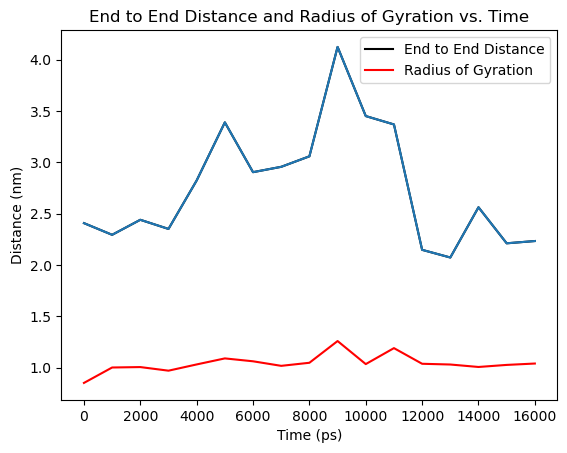

In [8]:
#Finally, we need to make two plots, one for distance and radius of gyration vs time and the other as a histogram

mplt.plot(traj.time, dist, c='k', label='End to End Distance')
mplt.plot(traj.time, dist)
mplt.plot(traj.time, radius, c='r', label='Radius of Gyration')
mplt.xlabel('Time (ps)')
mplt.ylabel('Distance (nm)')
mplt.title('End to End Distance and Radius of Gyration vs. Time')
mplt.legend()
mplt.show()

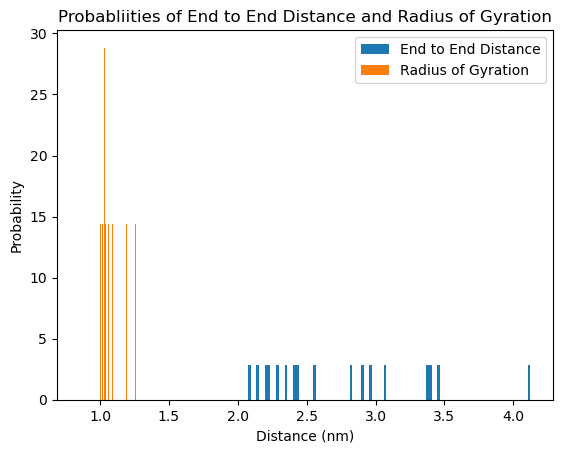

In [9]:
#Now, we need to figure out how to plot a normalized histogram of both distances and gyration radii:

mplt.hist(dist, bins=100, density=True, label='End to End Distance')
mplt.hist(radius, bins=100, density=True, label='Radius of Gyration')
mplt.xlabel('Distance (nm)')
mplt.ylabel('Probability')
mplt.title('Probabliities of End to End Distance and Radius of Gyration')
mplt.legend()
mplt.show()
